In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/Users/dev/Personal/DS & AI Class Notes/Data Sets/Adaboost/data_banknote_authentication.csv",header=None )

### Columns are ['variance' , 'skewness' , 'curtosis' , 'entropy' , 'class']

In [7]:
df.columns = ['variance' , 'skewness' , 'curtosis' , 'entropy' , 'class']

In [8]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [13]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

## Checking Balance of DF

In [14]:
df["class"].value_counts()

0    762
1    610
Name: class, dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

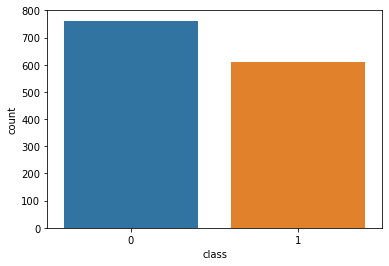

In [123]:
# plt.(df["class"],color='Red',)
# plt.show()
sns.countplot(df["class"],)

### Checking And Removing 0's IF

In [17]:
def checkz(df):
    return df[df == 0].value_counts()

In [18]:
for i in df.columns:
    print(checkz(df[i]))

Series([], Name: variance, dtype: int64)
Series([], Name: skewness, dtype: int64)
Series([], Name: curtosis, dtype: int64)
Series([], Name: entropy, dtype: int64)
0    762
Name: class, dtype: int64


### OD_Tech With The help of Skew

In [25]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [26]:
clist = ['variance', 'skewness', 'curtosis', 'entropy' ]

In [27]:
def odiqr(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    low = q1 - (1.5 * iqr)
    high = q3 + (1.5 * iqr)
    m = df.mean()
    df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
    return df

In [28]:
def odmsd(df):
    m = round(df.mean(),2)
    s = round(df.std(),2)
    low = round(m-(3*s),2)
    high = round(m+(3*s),2)
    ft1 = df[df<low]
    ft2 = df[df>high]
    df = df.map(lambda x : low if x < low else (high if x > high else x ))

In [29]:
for i in clist:
    print(f'{i} is {df[i].skew()}')

variance is -0.14938770055109993
skewness is -0.39410347444624066
curtosis is 1.088568543275335
entropy is -1.0222430438083978


In [32]:
for i in clist:
    if df[i].skew() >= 0.5:
        odmsd(df[i])
    else:
        df[i] = odiqr(df[i])

In [33]:
for i in clist:
    print(f'{i} is {df[i].skew()}')

variance is -0.14938770055109993
skewness is -0.39410347444624066
curtosis is 0.5977165081154234
entropy is -0.8377778918389013


## Shuffling

In [77]:
df = df.sample(frac=1)

In [78]:
df

,variance,skewness,curtosis,entropy,class
1226,-4.06790,2.4955,0.795710,-1.10390,1
887,-3.26920,-12.7406,1.397627,-0.14182,1
794,-1.62440,-6.3444,4.657500,0.16981,1
136,5.43800,9.4669,-4.941700,-3.92020,0
594,5.20320,3.5116,-1.253800,1.01290,0
...,...,...,...,...,...
1304,-5.29430,-5.1463,1.397627,-1.11810,1
560,4.04460,11.1741,-4.358200,-4.74010,0
1082,-1.39460,2.3134,-0.444990,-1.49050,1
501,1.29990,2.5762,2.010700,-0.18967,0


### Splitting

In [79]:
X = df.drop("class",axis=1)

In [80]:
X.sample()

,variance,skewness,curtosis,entropy
146,3.8584,0.78425,1.1033,1.7008


In [81]:
y = df["class"]

In [82]:
y.sample()

214    0
Name: class, dtype: int64

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold , cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier

In [84]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.20)

In [85]:
X.shape , Xtrain.shape , Xtest.shape

((1372, 4), (1097, 4), (275, 4))

In [86]:
y.shape , ytrain.shape , ytest.shape

((1372,), (1097,), (275,))

In [87]:
kf = KFold(n_splits=11)

In [88]:
dct = DecisionTreeClassifier()

In [89]:
rfc = RandomForestClassifier(criterion='entropy')

In [90]:
algo = [ dct , rfc ]

### Without Feature Scaling


In [91]:
for i in algo:
    i.fit(Xtrain,ytrain)
    s = i.score(Xtest,ytest)
    print(f'{i} = {s}')

DecisionTreeClassifier() = 0.9818181818181818
RandomForestClassifier(criterion='entropy') = 0.9854545454545455


### With Feature Scaling

In [92]:
ss = StandardScaler()

In [93]:
ss.fit(Xtrain)

StandardScaler()

In [94]:
Xtrain_ss = ss.transform(Xtrain)

In [95]:
Xtest_ss = ss.transform(Xtest)

In [96]:
for i in algo:
    i.fit(Xtrain_ss,ytrain)
    s = i.score(Xtest_ss,ytest)
    print(f'{i} = {s}')

DecisionTreeClassifier() = 0.9818181818181818
RandomForestClassifier(criterion='entropy') = 0.9854545454545455


### With Cross Validation

In [97]:
for i in algo:
    s = cross_val_score(i,X,y,cv = kf)
    print(f'{i} = {s.mean()}')

DecisionTreeClassifier() = 0.983958944281525
RandomForestClassifier(criterion='entropy') = 0.9919765395894428


## Boosting

In [98]:
rfc1 = RandomForestClassifier(n_estimators=150,max_depth=2,max_leaf_nodes=3)

In [99]:
abc = AdaBoostClassifier()

In [100]:
algo1 = [rfc1  , abc ]

In [101]:
for i in algo1:
    print(i)

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150)
AdaBoostClassifier()


### Without Feature Scaling


In [102]:
for i in algo1:
    i.fit(Xtrain,ytrain)
    s = i.score(Xtest,ytest)
    print(f'{i} = {s}')

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150) = 0.8909090909090909
AdaBoostClassifier() = 0.9890909090909091


### With Feature Scaling

In [103]:
for i in algo1:
    i.fit(Xtrain_ss,ytrain)
    s = i.score(Xtest_ss,ytest)
    print(f'{i} = {s}')

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150) = 0.8872727272727273
AdaBoostClassifier() = 0.9890909090909091


###  With Cross Validation (Boosting)


In [104]:
%%time
for i in algo1:
    s = cross_val_score(i,X,y,cv = kf)
    print(f'{i} = {s.mean()}')

RandomForestClassifier(max_depth=2, max_leaf_nodes=3, n_estimators=150) = 0.9008680351906158
AdaBoostClassifier() = 0.9970850439882697
CPU times: user 2.21 s, sys: 12.1 ms, total: 2.22 s
Wall time: 2.22 s


### With GridSearch CV

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
dic = { 'n_estimators' : [100,125,180],'criterion': ['gini', 'entropy'], 'max_depth' : [2,3,10]
       ,'min_samples_leaf' : [ 1,5]  }

In [107]:
kf1 = KFold(n_splits=12)

In [108]:
gvc = GridSearchCV(RandomForestClassifier(),param_grid=dic,cv = kf1)

In [109]:
%%time
gvc.fit(X,y)

CPU times: user 1min 5s, sys: 370 ms, total: 1min 5s
Wall time: 1min 5s


GridSearchCV(cv=KFold(n_splits=12, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 10], 'min_samples_leaf': [1, 5],
                         'n_estimators': [100, 125, 180]})

In [110]:
gvc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [111]:
gvc.best_estimator_

RandomForestClassifier(max_depth=10)

In [112]:
gvc.best_score_

0.9948957538774472

### With RandomSearch CV

In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
rvc = RandomizedSearchCV(RandomForestClassifier(),param_distributions=dic,cv = kf1)

In [117]:
%%time
rvc.fit(X,y)

CPU times: user 15.9 s, sys: 97.7 ms, total: 16 s
Wall time: 16 s


RandomizedSearchCV(cv=KFold(n_splits=12, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 10],
                                        'min_samples_leaf': [1, 5],
                                        'n_estimators': [100, 125, 180]})

In [118]:
rvc.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 1,
 'max_depth': 10,
 'criterion': 'entropy'}

In [119]:
rvc.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10)

In [120]:
rvc.best_score_

0.993440122044241